In [1]:
import pathlib

import pandas as pd
import seaborn as sns

In [2]:
cd /home/pimienta/Documents/repos/coding/vocalpy/songdkl

/home/pimienta/Documents/repos/coding/vocalpy/songdkl


In [9]:
runall_numsyls_csv = './results/runall-numsyls-n-basis-50-basis-first-min-components-2-max-components-22-n-splits-1.csv'
runall_df = pd.read_csv(runall_numsyls_csv)
runall_df.drop(columns='Unnamed: 0', inplace=True)
runall_df['source'] = 'songdkl'

In [10]:
sylno_csv = './tests/data-for-tests/source/sylno_out.csv'
sylno_df = pd.read_csv(sylno_csv, header=None)
sylno_df.columns = ['bird_id', 'n_syls']
sylno_df['source'] = 'pcb'
sylno_df['run'] = 1
sylno_df = sylno_df[sylno_df.bird_id.isin(runall_df.bird_id.values)]

In [12]:
data = pd.concat((sylno_df[:5], runall_df[:20]))

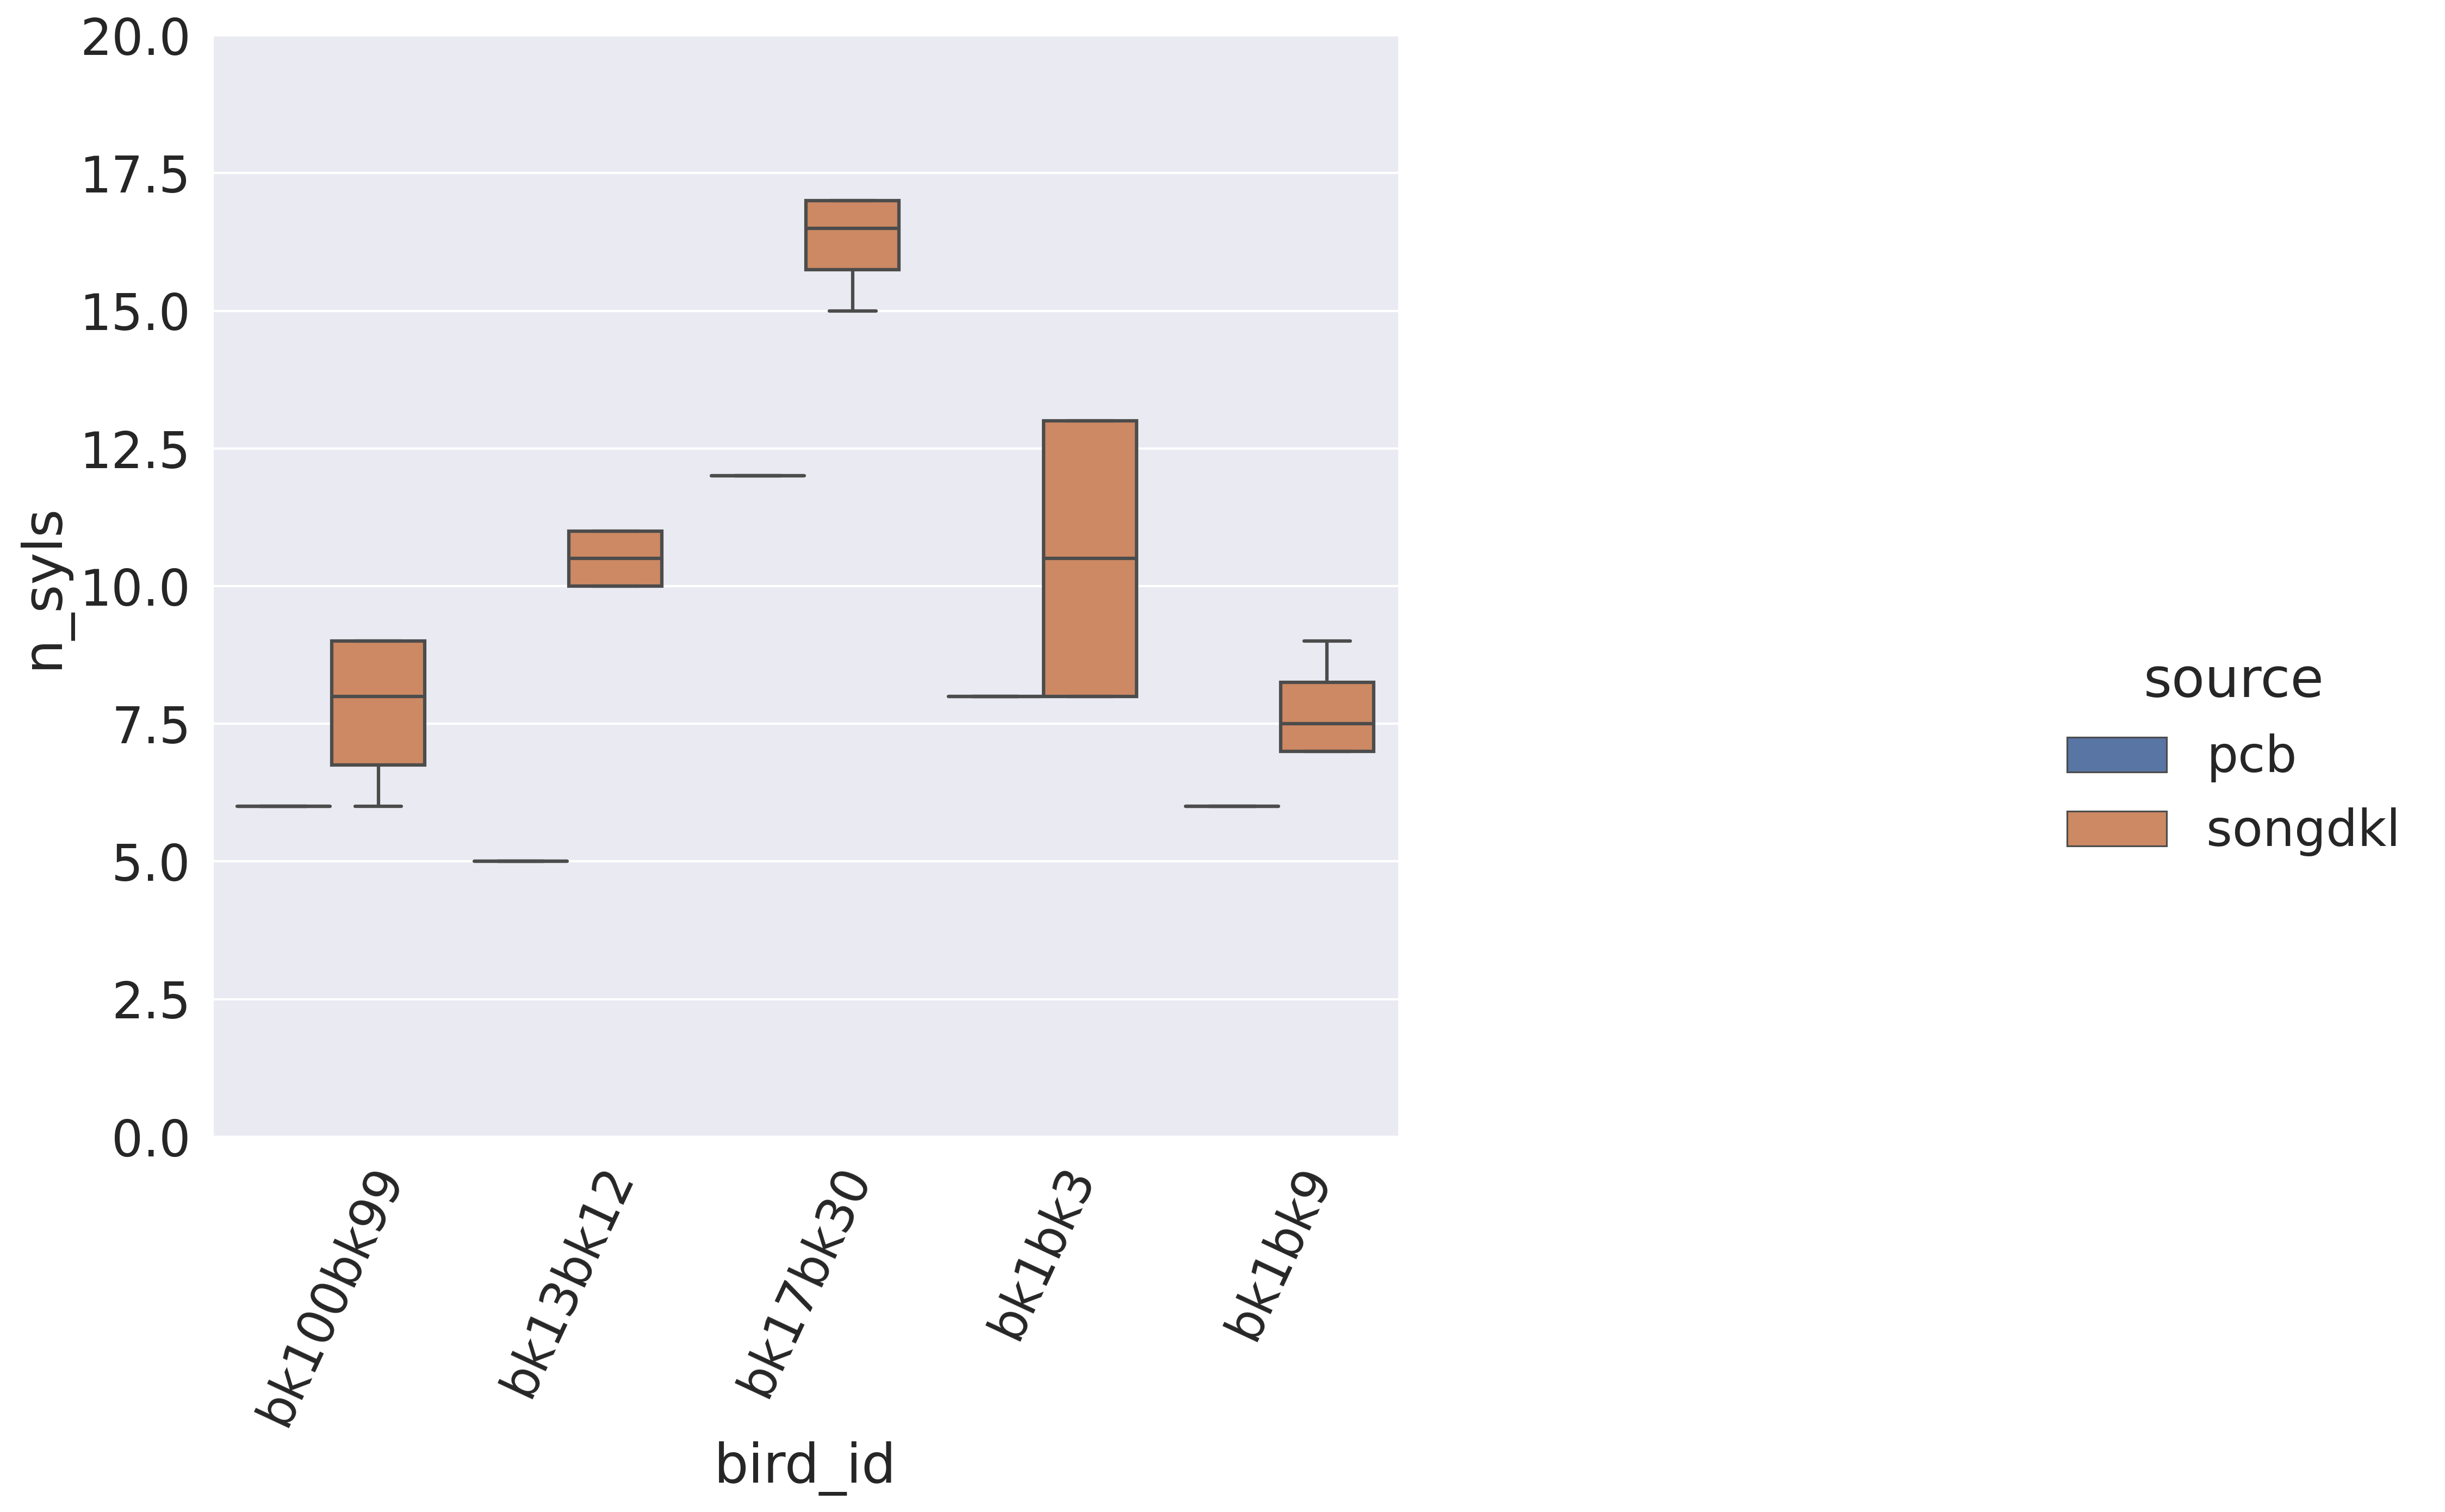

In [15]:
sns.set_context('talk')
sns.set(font_scale=2)

g = sns.catplot(
    data=data,
    x='bird_id',
    y='n_syls',
    kind='box',
    hue='source',
)
ax = g.axes[0][0]
ax.set_ylim([0, 20])
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.tick_params(axis='x', rotation=65)

g.fig.set_size_inches(20, 10)
g.fig.set_dpi(300)